In [50]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

from scipy.io import loadmat
from scipy import ndimage

from PCA import PCA
from ISOMAP import ISOMAP

In [51]:
def plot_images(img_array, title):
    
    formatted_img_array = []
    fig = plt.figure(figsize=(10, 7))
    
    for i, image in enumerate(img_array):
        image_reshaped = (image.reshape(64, 64) * 255)
        formatted_img_array.append(PIL.Image.fromarray(image_reshaped))
    
    for i, image in enumerate(formatted_img_array):
        subplot = fig.add_subplot(1, 5, i + 1)
        subplot.title.set_text(title)
        image = ndimage.rotate(image, -90)
        plt.imshow(image, cmap=plt.cm.gray)

In [52]:
images = loadmat('data/isomap.mat')['images'].transpose()

In [53]:
isomap = ISOMAP()

In [54]:
isomap.load_data(images)

In [55]:
isomap.generate_low_dimensional_representation()

### 3.1

As you can see below, generally speaking, the adjacency matrix does a good job of grouping "similar" images; i.e. similar images are more closely connected (via Euclidean distance) in the graph. I've gone ahead and plotted the first ten indices of the adjacency matrix heatmat; note: image 0 and image 2 happen to have a small Euclidean distance (image 2 is the second image from left in the "closest images" figure for the first sample). This is backed up by the "dark red" entry for the corrosponding images 0 and 2 in the heatmat- the darker red, the more closely related (zero being black) the images are.

The two reference images below were selected randomly from the adjacency matrix and the closest data points (with the lowest Euclidean distance) are shown and the farthest non-zero data points (largest Euclidean distance) are also shown. Generally, the closer data points correspond to images that look similar and the farther data points correspond to images that look dissimilar. 

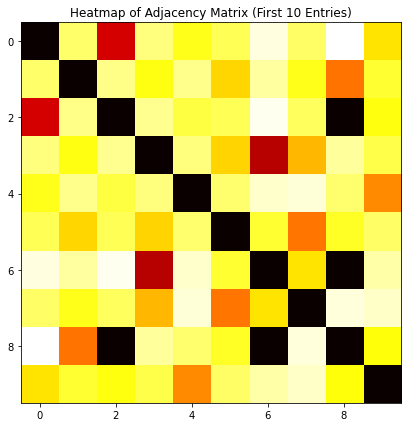

In [56]:
fig = plt.figure(figsize=(10, 7))

plt.imshow(isomap.adjacency_matrix[0:10, 0:10], cmap='hot', interpolation='nearest')
plt.title('Heatmap of Adjacency Matrix (First 10 Entries)')
plt.show()

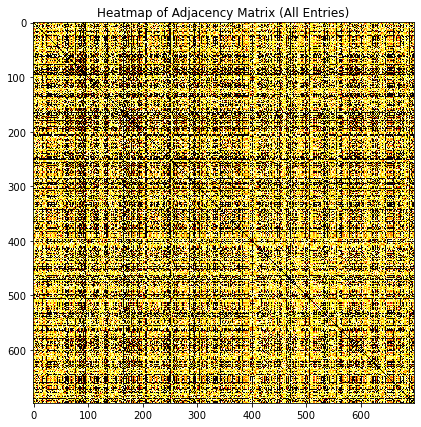

In [57]:
fig = plt.figure(figsize=(10, 7))

plt.imshow(isomap.adjacency_matrix, cmap='hot', interpolation='nearest')
plt.title('Heatmap of Adjacency Matrix (All Entries)')
plt.show()

#### First Reference Image:

In [58]:
image_list_closest = []
idx_list_closest = []
for entry in np.sort(isomap.adjacency_matrix[0][np.nonzero(isomap.adjacency_matrix[0])])[:4]:
    image_list_closest.append(isomap.data[np.where(isomap.adjacency_matrix[0] == entry)[0][0]])
    idx_list_closest.append(np.where(isomap.adjacency_matrix[0] == entry)[0][0])
    
image_list_farthest = []
idx_list_farthest = []
for entry in np.sort(isomap.adjacency_matrix[0][np.nonzero(isomap.adjacency_matrix[0])])[-4:]:
    image_list_farthest.append(isomap.data[np.where(isomap.adjacency_matrix[0] == entry)[0][0]])
    idx_list_farthest.append(np.where(isomap.adjacency_matrix[0] == entry)[0][0])

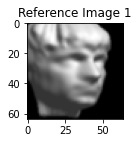

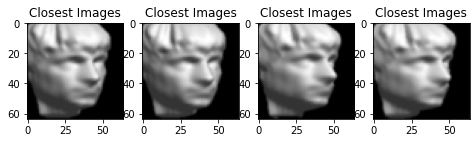

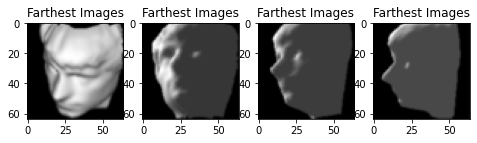

In [59]:
plot_images([isomap.data[0]], 'Reference Image 1')
plot_images(image_list_closest, 'Closest Images')
plot_images(image_list_farthest, 'Farthest Images')

#### Second Reference Image:

In [60]:
image_list_closest = []
for entry in np.sort(isomap.adjacency_matrix[100][np.nonzero(isomap.adjacency_matrix[100])])[:4]:
    image_list_closest.append(isomap.data[np.where(isomap.adjacency_matrix[100] == entry)[0][0]])
    
image_list_farthest = []
for entry in np.sort(isomap.adjacency_matrix[100][np.nonzero(isomap.adjacency_matrix[100])])[-4:]:
    image_list_farthest.append(isomap.data[np.where(isomap.adjacency_matrix[100] == entry)[0][0]])

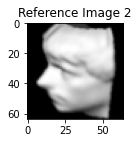

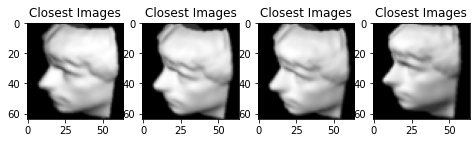

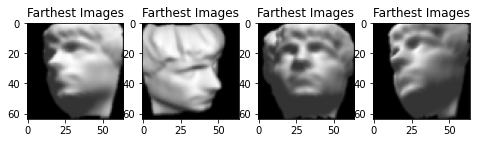

In [61]:
plot_images([isomap.data[100]], 'Reference Image 2')
plot_images(image_list_closest, 'Closest Images')
plot_images(image_list_farthest, 'Farthest Images')

### 3.2

Below is the creation of the isomap object from the ISOMAP class (written in ISOMAP.py). Each of the images imbedded into the new feature space is plotted below. These embeddings are, generally, clustered together based on image similarity. This is exemplified with the three colored clusters seen in the plot. Each of the clustered points are near each other while the clusters themselves are relatively far away from one another and all of the clustered points are similar (the corrosponding images look very similar) while the clusters themselves are different (the faces are similar within the cluster, but the clusters themselves have very different faces from one another). This, theoretically, would allow for clustering in this 2D space to classify each of the embedded points as a face "direction." It's easy to see that orange points contain faces pointing left, the red points contain faces pointing straight-left, and the purple points contain faces pointing right. 

In [62]:
image_list_left = []
image_list_bottom = []
image_list_right = []

for i in range(5, 10, 1):
    
    image_list_left.append(np.argmin((isomap.z_matrix[:, 0] - (-0.00025 + i/500000)) ** 2 + (isomap.z_matrix[:, 1] - (i/100000)) ** 2))
    image_list_bottom.append(np.argmin((isomap.z_matrix[:, 0] - (0.00005 + i/100000)) ** 2 + (isomap.z_matrix[:, 1] - (-0.0003 + i/100000)) ** 2))
    image_list_right.append(np.argmin((isomap.z_matrix[:, 0] - (0.00025 + i/500000)) ** 2 + (isomap.z_matrix[:, 1] - (i/100000)) ** 2))
    
image_list_left = list(set(image_list_left))
image_list_bottom = list(set(image_list_bottom))
image_list_right = list(set(image_list_right))

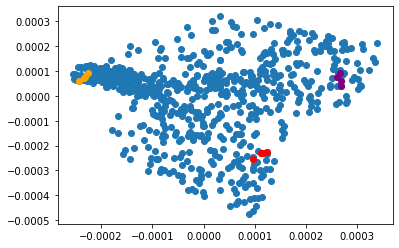

In [63]:
plt.scatter(isomap.z_matrix[:, 0], isomap.z_matrix[:, 1])

for idx in image_list_left[:4]:
    plt.scatter(isomap.z_matrix[idx, 0], isomap.z_matrix[idx, 1], color='orange')
    
for idx in image_list_bottom[:4]:
    plt.scatter(isomap.z_matrix[idx, 0], isomap.z_matrix[idx, 1], color='red')
    
for idx in image_list_right[:4]:
    plt.scatter(isomap.z_matrix[idx, 0], isomap.z_matrix[idx, 1], color='purple')

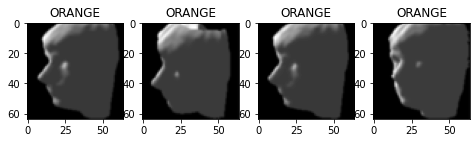

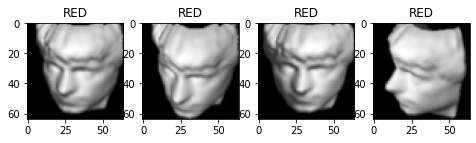

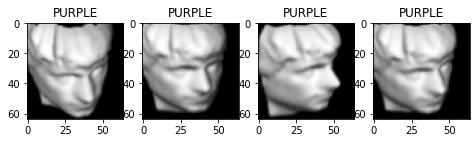

In [64]:
plot_images(isomap.data[image_list_left[:4], :], 'ORANGE')
plot_images(isomap.data[image_list_bottom[:4], :], 'RED')
plot_images(isomap.data[image_list_right[:4], :], 'PURPLE')

### 3.3

Below is a plot of the embedded points, similar to 3.2 but using 'Manhattan' or 'City block' distance instead of Euclidean distance. As seen below, the same points as 3.2 are displayed in the plot. Within the plot, they are still close to one another, however the plot "shape" is very obviously different (it seems close to a 180 degree rotation). Based on observation, choosing a different distance measure changes the plot, but maintains the cluster "properties" of similarity within the cluster and dissimilarity far away from the cluster. 

In [65]:
isomap = ISOMAP(dist_measure='cityblock')
isomap.load_data(images)
isomap.generate_low_dimensional_representation()

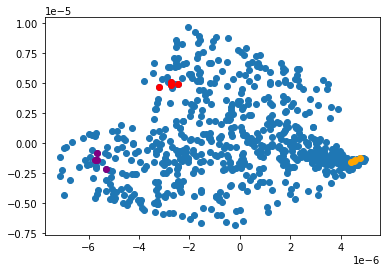

In [66]:
plt.scatter(isomap.z_matrix[:, 0], isomap.z_matrix[:, 1])

for idx in image_list_left[:4]:
    plt.scatter(isomap.z_matrix[idx, 0], isomap.z_matrix[idx, 1], color='orange')
    
for idx in image_list_bottom[:4]:
    plt.scatter(isomap.z_matrix[idx, 0], isomap.z_matrix[idx, 1], color='red')
    
for idx in image_list_right[:4]:
    plt.scatter(isomap.z_matrix[idx, 0], isomap.z_matrix[idx, 1], color='purple')

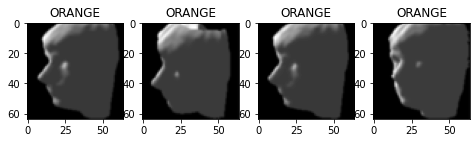

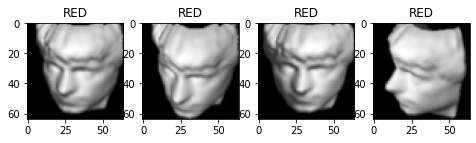

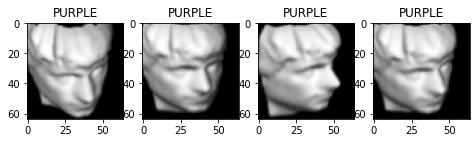

In [67]:
plot_images(isomap.data[image_list_left[:4], :], 'ORANGE')
plot_images(isomap.data[image_list_bottom[:4], :], 'RED')
plot_images(isomap.data[image_list_right[:4], :], 'PURPLE')

### 3.4

Seen below is another dimensionality reducing technique, PCA, that describes data linearly (as opposed to ISOMAP which is non-linear). The same method of chooseing close points to represent "clusters" was used for this plot as well, indicated by the orange, red, and purple clusters. These clusters, like ISOMAP, generally have similar faces and directions, however the similarity is not as striking. For example, the orange cluster's images are similar in brightness, but they are facing different directions. With the other two clusters, the images are similar but not AS similar as in ISOMAP. For the most part, the more meaningful projection was via ISOMAP.

In [68]:
pca = PCA()

In [69]:
pca.load_data(images)

In [70]:
pca.transform_data()

In [71]:
image_list_left = []
image_list_bottom = []
image_list_right = []

for i in range(5, 100, 1):
    
    image_list_left.append(np.argmin((pca.transformed_data[:, 0] - (-10 + i/100)) ** 2 + (pca.transformed_data[:, 1] - (2.5 + i/100)) ** 2))
    image_list_bottom.append(np.argmin((pca.transformed_data[:, 0] - (-1 + i/100)) ** 2 + (pca.transformed_data[:, 1] - (-14 + i/100)) ** 2))
    image_list_right.append(np.argmin((pca.transformed_data[:, 0] - (12 + i/100)) ** 2 + (pca.transformed_data[:, 1] - (2.5 + i/100)) ** 2))
    
image_list_left = list(set(image_list_left))
image_list_bottom = list(set(image_list_bottom))
image_list_right = list(set(image_list_right))

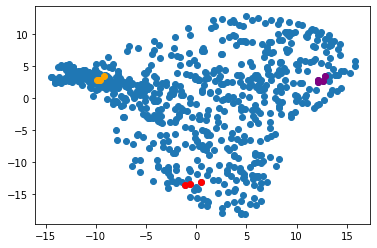

In [72]:
plt.scatter(pca.transformed_data[:, 0], pca.transformed_data[:, 1])

for idx in image_list_left[:4]:
    plt.scatter(pca.transformed_data[idx, 0], pca.transformed_data[idx, 1], color='orange')
    
for idx in image_list_bottom[:4]:
    plt.scatter(pca.transformed_data[idx, 0], pca.transformed_data[idx, 1], color='red')
    
for idx in image_list_right[:4]:
    plt.scatter(pca.transformed_data[idx, 0], pca.transformed_data[idx, 1], color='purple')

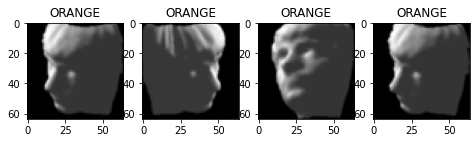

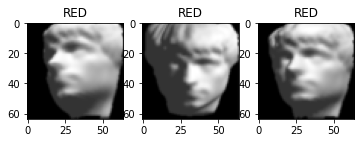

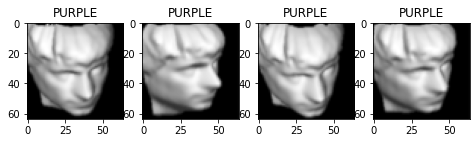

In [73]:
plot_images(pca.data[image_list_left[:4], :], 'ORANGE')
plot_images(pca.data[image_list_bottom[:4], :], 'RED')
plot_images(pca.data[image_list_right[:4], :], 'PURPLE')